# Wine Quality Prediction

In [5]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Load the data
data=pd.read_csv("winequality-red.csv")

In [7]:
#Read the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
#Shape of the data
data.shape

(1599, 12)

In [10]:
#columns
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
#Check any null values are present in the data
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
#Get the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
#Describe
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Exploratory data analysis


In [14]:
class Dataframe_info:
    def __init__(self):
        print('Attribute information object is created')
        
    def Attribute_information(self,data):
        data_info=pd.DataFrame(columns=['No of Observations',
                                       'No of variables',
                                       'No of Numerical variables',
                                        'No of Factor variables',
                                       'No of Categorical variables',
                                       'No of Logical variables',
                                       'No of Date variables',
                                       'No of zero variance variables'])
        
        data_info.loc[0,'No of Observations']=data.shape[0]
        data_info.loc[0,'No of variables']=data.shape[1]
        data_info.loc[0,'No of Numerical variables']=data._get_numeric_data().shape[1]
        data_info.loc[0,'No of Factor variables']=data.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of Categorical variables']=data.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Logical variables']=data.select_dtypes(include='bool').shape[1]
        data_info.loc[0,'No of Date variables']=data.select_dtypes(include='datetime64').shape[1]
        data_info.loc[0,'No of zero variance variables']=data.loc[:,data.apply(pd.Series.nunique)==1].shape[1]
        
        data_info=data_info.transpose()
        data_info.columns=['value']
        
        return data_info
    
    def get_missing_data(self,df):
        
        #check how many missing value are present in the data
        missing_values=data.isnull().sum()
        #sort the missing value from few to many
        missing_values.sort_values(ascending=False,inplace=True)
        
        return missing_values
    
    def agg_tabulation(self,data):
        """This method gives the additional information about the data like entrophy values,percentage of missing values
        """
        
        print("-"*30)
        print('Agg Tabulation')
        table=pd.DataFrame(data.dtypes,columns=['dtypes'])
        table=table.reset_index()
        table=table.rename(columns={'index':'Name'})
        table['No of Missing values']=data.isnull().sum().values
        table['No of unique values']=data.nunique().values
        table['Percentage of Missing data']=((data.isnull().sum().values/data.shape[0]))*100
        table['First Observation']=data.loc[0].values
        table['Second Observation']=data.loc[1].values
        table['Third Observation']=data.loc[2].values
        
        return table
    
    def iqr(self,x):
        """ This method gives the inter quartile range of the each variable
        """
        return x.quantile(q=0.75)-x.quantile(q=0.25)
    
    def otlier_s(self,x):
        """This is a private method which gives the how much outliers that are present in the variable 
        """
        upper_out=x.quantile(q=0.75)+1.5*self.iqr(x)
        lower_out=x.quantile(q=0.25)-1.5*self.iqr(x)
        
        return len(x[x > upper_out])+len(x[x < lower_out])

In [15]:
dataframe=Dataframe_info()

Attribute information object is created


In [16]:
dataframe.Attribute_information(data)

,value
No of Observations,1599
No of variables,12
No of Numerical variables,12
No of Factor variables,0
No of Categorical variables,0
No of Logical variables,0
No of Date variables,0
No of zero variance variables,0


In [17]:
dataframe.get_missing_data(data)

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

In [18]:
dataframe.agg_tabulation(data)

------------------------------
Agg Tabulation


,Name,dtypes,No of Missing values,No of unique values,Percentage of Missing data,First Observation,Second Observation,Third Observation
0,fixed acidity,float64,0,96,0.0,7.4000,7.8000,7.800
1,volatile acidity,float64,0,143,0.0,0.7000,0.8800,0.760
2,citric acid,float64,0,80,0.0,0.0000,0.0000,0.040
3,residual sugar,float64,0,91,0.0,1.9000,2.6000,2.300
4,chlorides,float64,0,153,0.0,0.0760,0.0980,0.092
5,free sulfur dioxide,float64,0,60,0.0,11.0000,25.0000,15.000
6,total sulfur dioxide,float64,0,144,0.0,34.0000,67.0000,54.000
7,density,float64,0,436,0.0,0.9978,0.9968,0.997
8,pH,float64,0,89,0.0,3.5100,3.2000,3.260
9,sulphates,float64,0,96,0.0,0.5600,0.6800,0.650


In [19]:
dataframe.iqr(data)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64

In [20]:
dataframe.otlier_s(data)

3198

In [21]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

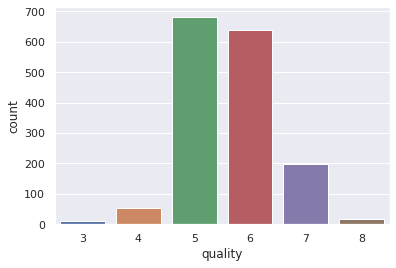

In [23]:
sns.countplot(data['quality'])

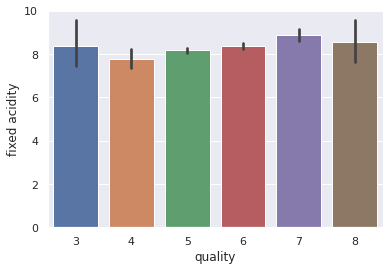

In [24]:
sns.barplot(x='quality',y='fixed acidity',data=data);

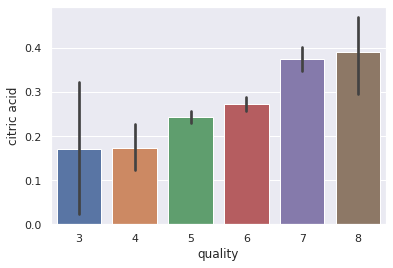

In [25]:
sns.barplot(x='quality',y='citric acid',data=data);

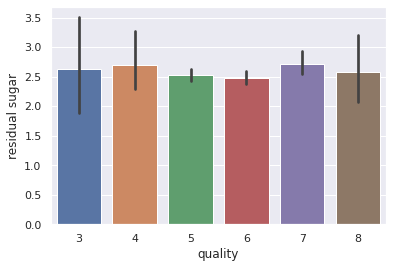

In [26]:
sns.barplot(x='quality',y='residual sugar',data=data)

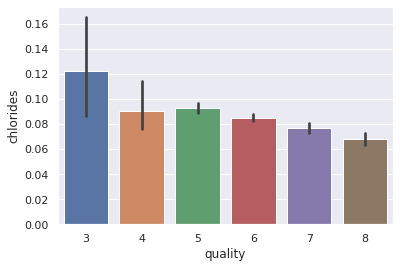

In [27]:
sns.barplot(x='quality',y='chlorides',data=data)

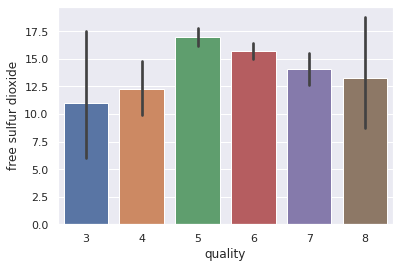

In [28]:
sns.barplot(x='quality',y='free sulfur dioxide',data=data)

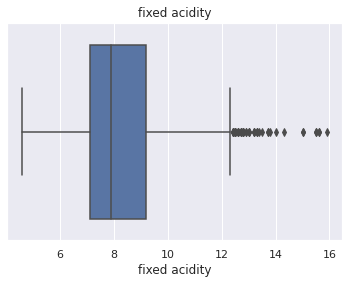

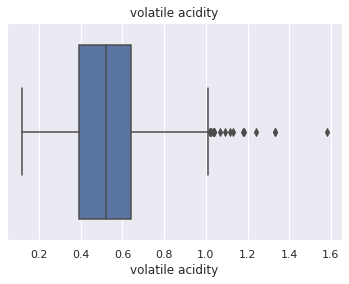

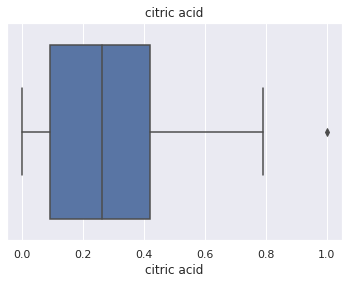

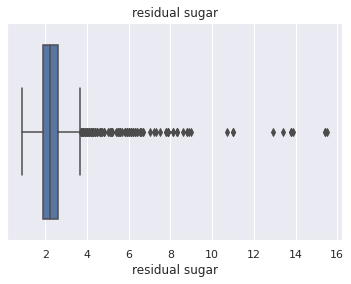

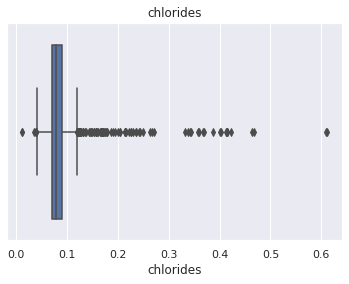

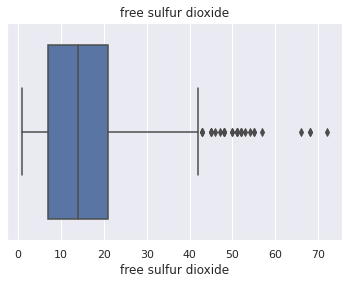

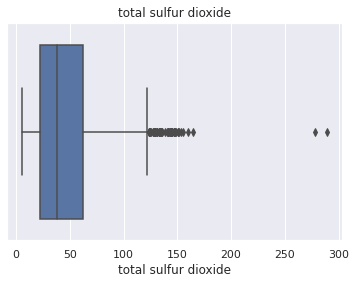

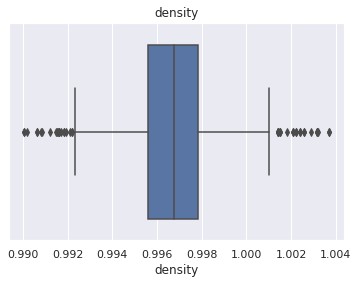

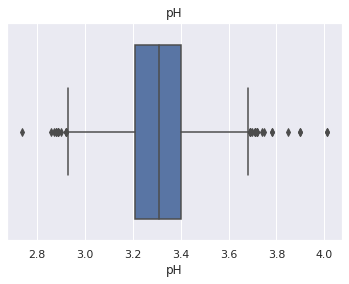

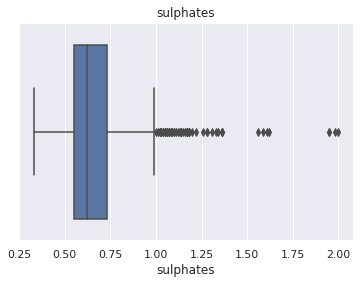

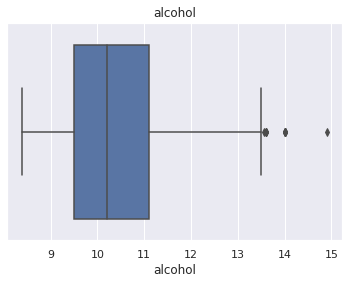

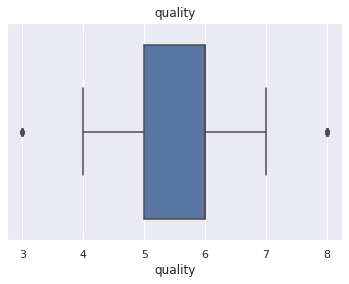

In [29]:
for feature in data.columns:
    data=data.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()


In [30]:
#Dividing the wine quality by good and bad by limits
bins=(2,6.5,8)
labels=['Bad','Good']
data['quality']=pd.cut(data['quality'],labels=labels,bins=bins)

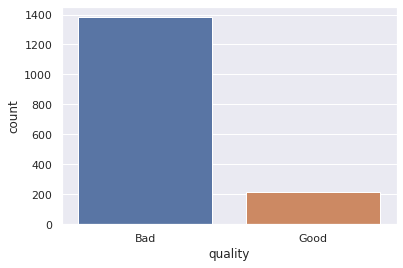

In [31]:
sns.countplot(data['quality'])

In [32]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['quality']=lc.fit_transform(data['quality'])
data['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [33]:
#Check data is balanced or not
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

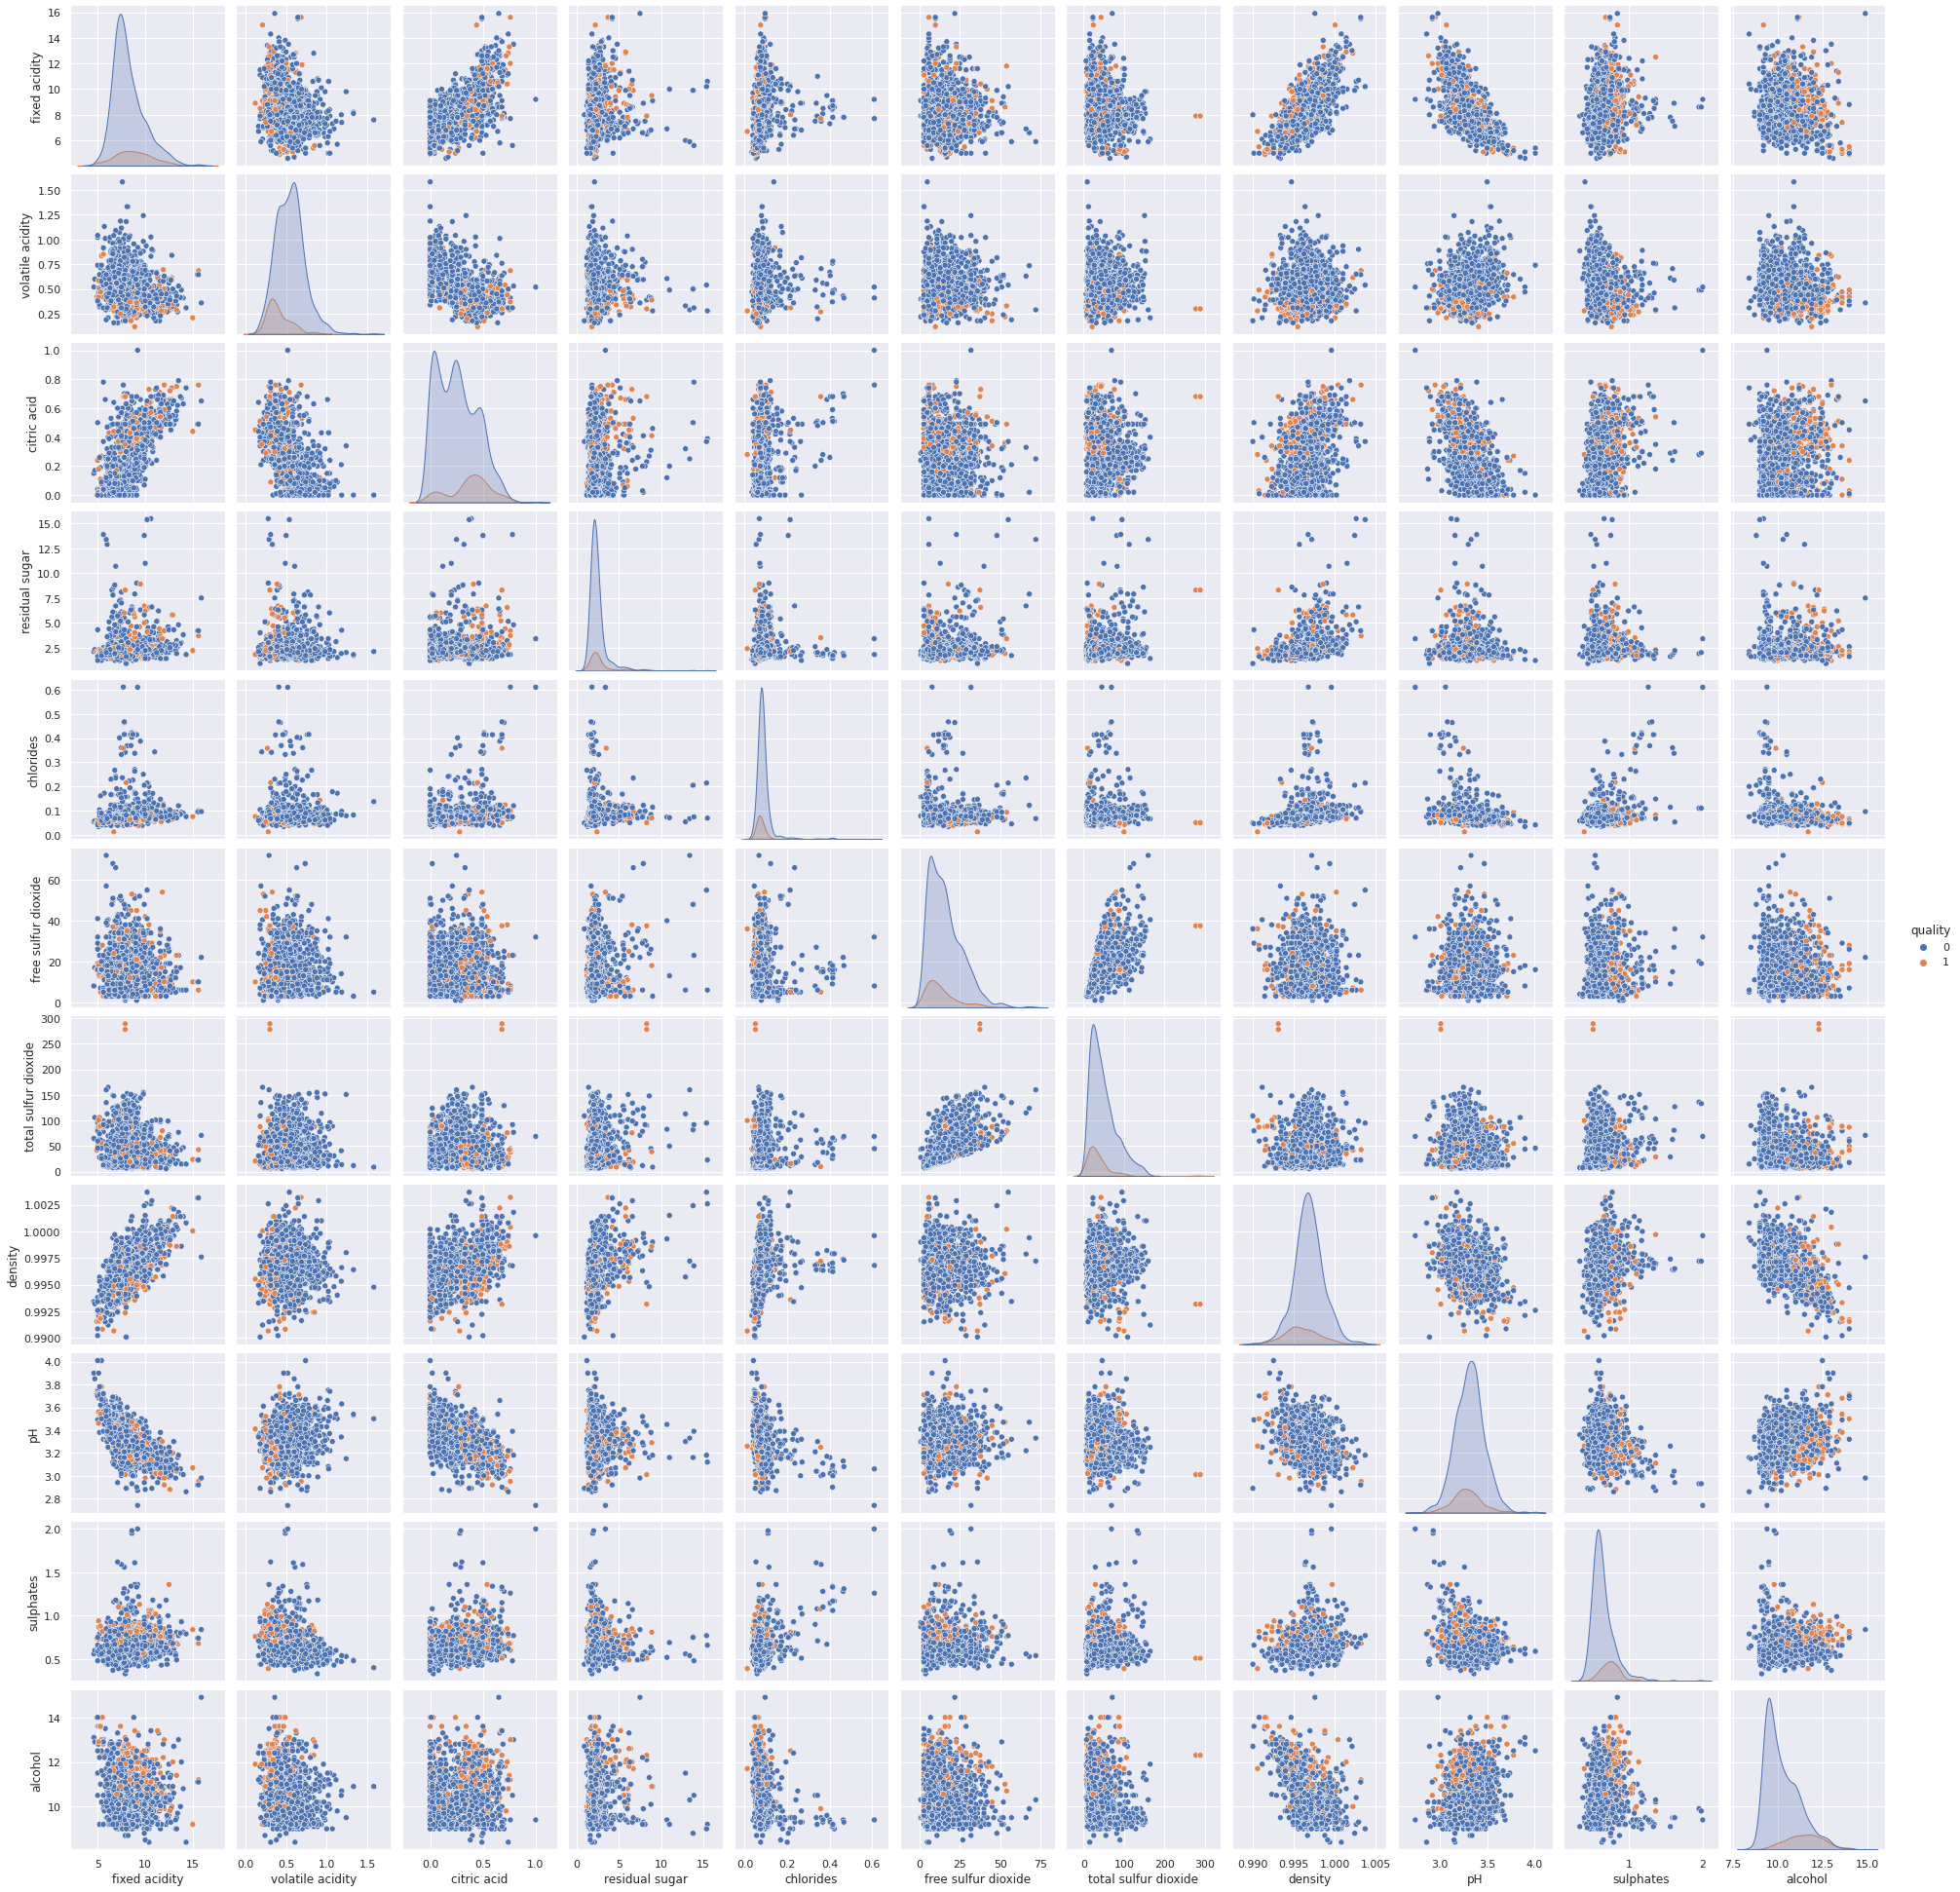

In [34]:
#Visualze the data with pairplot
sns.pairplot(data,hue='quality')

In [35]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


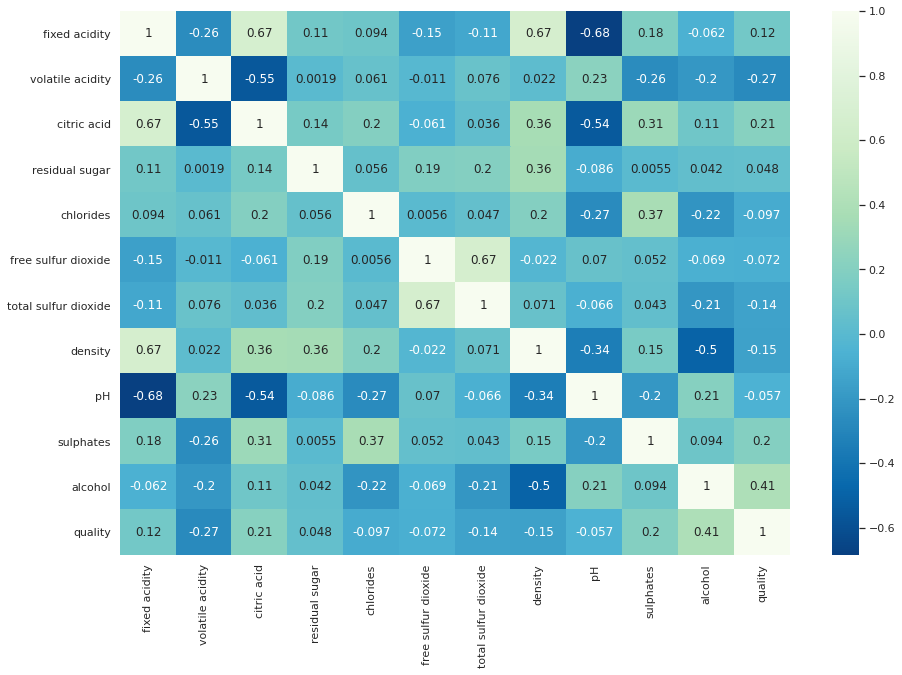

In [36]:
#correlation with heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='GnBu_r')

In [37]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


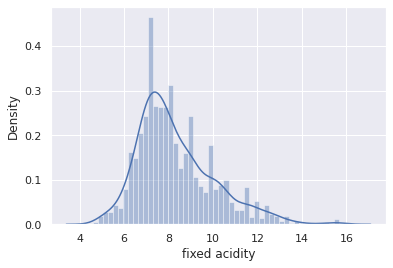

In [38]:
#Check features are normally distributed or not
sns.distplot(data['fixed acidity'],bins=50,hist=True)

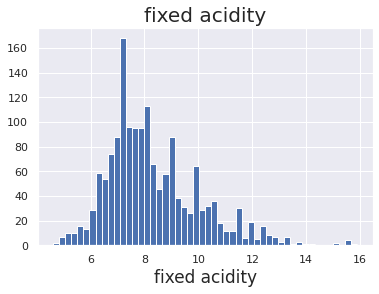

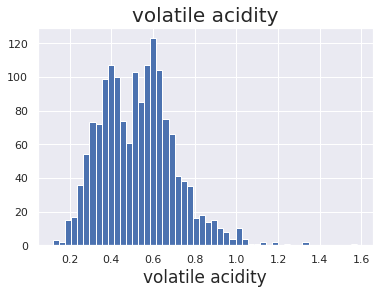

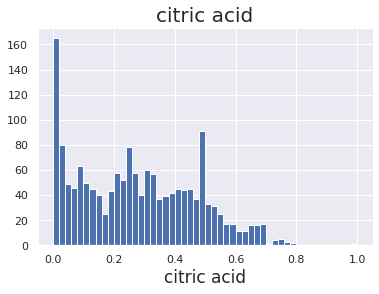

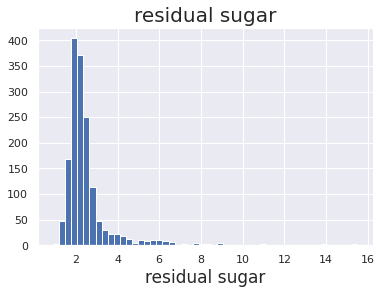

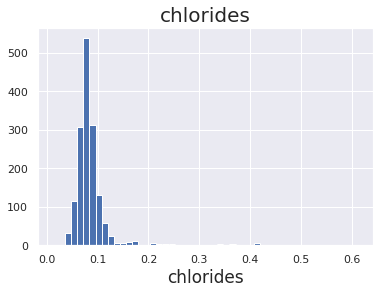

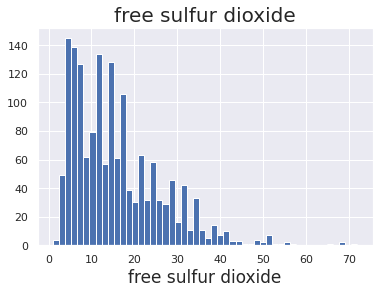

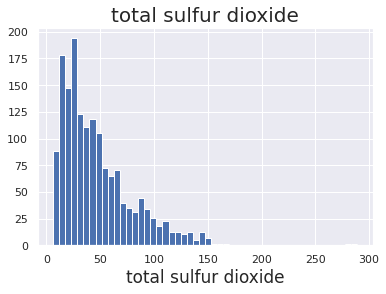

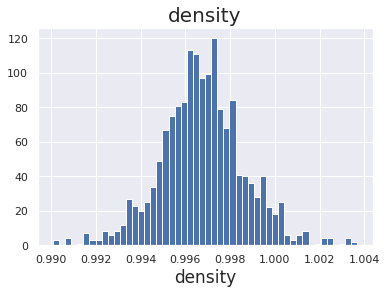

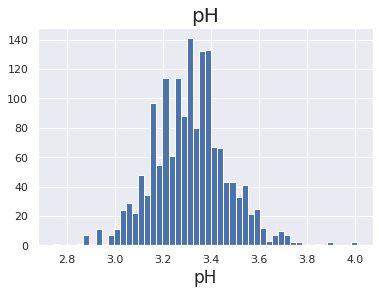

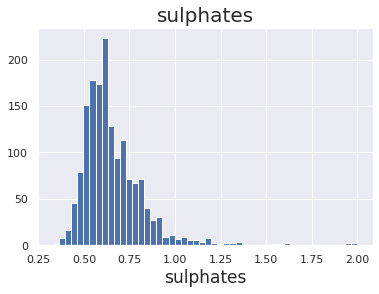

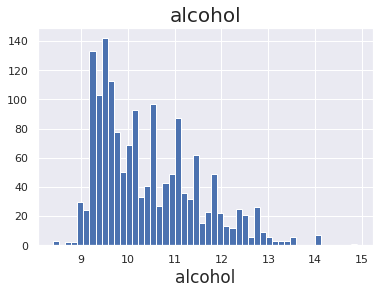

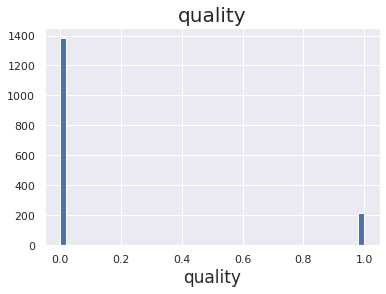

In [39]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=50)
    plt.xlabel(feature,fontsize=17)
    plt.title(feature,fontsize=20)
    plt.show()

from the above 'histogram' plots we can clearly observe that the some features are not normally distributed so we need to transform the variables in to standard distribution

Some Features are right skewed, we need to handle thos features.

## Feature Selection


In [40]:
#split the data in to x and y
x=data.iloc[:,:-1]
y=data['quality']
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select=SelectKBest(score_func=chi2,k=10)
select_feat=select.fit(x,y)

In [42]:
select_feat

SelectKBest(k=10, score_func=<function chi2 at 0x7f576d69e170>)

In [43]:
select_data=pd.DataFrame(select_feat.scores_,columns=['Score'],index=x.columns)

In [44]:
select_data

,Score
fixed acidity,8.393096
volatile acidity,7.113769
citric acid,10.317077
residual sugar,2.856369
chlorides,0.383204
free sulfur dioxide,56.696032
total sulfur dioxide,724.343506
density,0.000129
pH,0.037747
sulphates,2.776190


In [45]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra_feat=extra.fit(x,y)

In [46]:
extra_feat.feature_importances_

array([0.079629  , 0.10132418, 0.09035378, 0.07759423, 0.06802166,
       0.06777394, 0.08042299, 0.08806793, 0.06675016, 0.11157199,
       0.16849014])

In [47]:
ex_data=pd.Series(extra_feat.feature_importances_,index=x.columns)

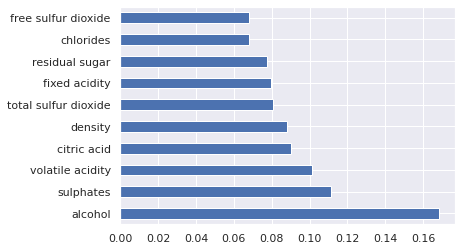

In [48]:
ex_data.nlargest(10).plot(kind='barh');

In [49]:

#Split the data in to train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
#standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Model selection

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold

In [52]:
class Model_Selector():
    
    

    def __init__(self):
        print("Model Selector object created")
        
    """
    This method helps to select
    the best machine learning 
    model to compute the relationship
    betweem i/p and d/p variable
    
    """    
        
        
    def Classification_Model_Selector(self,df):
        seed = 42
        models = []
        models.append(("LR", LogisticRegression()))
        models.append(("RF", RandomForestClassifier(n_estimators=100,\
            random_state=42,max_depth=10)))
        models.append(("KNN", KNeighborsClassifier()))
        models.append(("CART", DecisionTreeClassifier()))
        models.append(("SVC",SVC()))
        result = []
        names = []
        scoring = 'accuracy'
        seed = 42
        
        

        for name, model in models:
            kfold = KFold(n_splits = 5, random_state =seed,shuffle=True)
            cv_results = cross_val_score(model, x_train,\
                    y_train, cv = kfold, scoring = scoring)
            result.append(cv_results)
            names.append(name)
            msg = (name, cv_results.mean(), cv_results.std())
            print(msg)
            
            
            
        fig = plt.figure(figsize = (8,4))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(1,1,1)
        plt.boxplot(result)
        ax.set_xticklabels(names)
        plt.show()

In [53]:
model=Model_Selector()

Model Selector object created


('LR', 0.8827144607843138, 0.006655442800546598)
('RF', 0.9053799019607844, 0.01234054936446828)
('KNN', 0.8772395833333334, 0.017108086741200616)
('CART', 0.8608149509803921, 0.01140197866481283)
('SVC', 0.886623774509804, 0.004453158461616396)


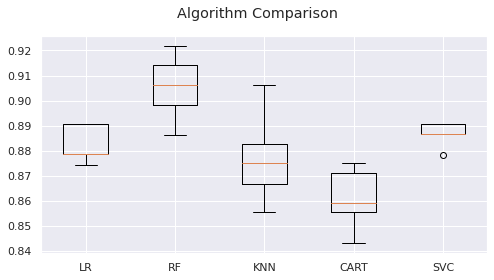

In [54]:
model.Classification_Model_Selector(data)

## HyperParameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost

In [56]:
#Parameters

params={"Learning_rate":[0.05,0.1,0.2,0.25,0.3,0.35],
       "max_depth":[3,4,5,6,8,9,10,12],
       "min_child_weight":[1,3,5,7,10],
       "colsample_bytree":[0.3,0.5,0.7,0.9]}

In [57]:
#intialize the classifier with xgboost
classifier=xgboost.XGBClassifier()

In [58]:
rf_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,cv=10,scoring='roc_auc',n_jobs=-1,verbose=3)

In [59]:
rf_model.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.2s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [60]:
rf_model.best_estimator_

XGBClassifier(Learning_rate=0.05, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [61]:
rf_model.best_params_

{'Learning_rate': 0.05,
 'colsample_bytree': 0.9,
 'max_depth': 10,
 'min_child_weight': 1}

In [62]:
best_random=rf_model.best_estimator_
best_random

XGBClassifier(Learning_rate=0.05, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

random_pred=best_random.predict(x_test)
print(accuracy_score(y_test,random_pred))
print(classification_report(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))

0.884375
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.68      0.40      0.51        47

    accuracy                           0.88       320
   macro avg       0.79      0.69      0.72       320
weighted avg       0.87      0.88      0.87       320

[[264   9]
 [ 28  19]]


In [65]:
#Hyperparametre tuning With Randomforestclassifier
#Number of trees in the random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#Number of features to be considerd at every split
max_features=['auto','sqrt','log2']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,10)]
#Number of samples required for split a node
min_samples_split=[2,5,10,14]
#Number of samples required at each leaf node
min_samples_leaf=[2,3,6,8,10]

random_grid={
    "n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "criterion":['entrophy','gini']
            }

random_grid

{'criterion': ['entrophy', 'gini'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [2, 3, 6, 8, 10],
 'min_samples_split': [2, 5, 10, 14],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [66]:
rf=RandomForestClassifier()
random_model=RandomizedSearchCV(rf,param_distributions=random_grid,cv=10,n_iter=100,verbose=3,n_jobs=-1,random_state=42)

In [67]:
random_model.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 24.9min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [68]:
random_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=890, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
random_model.best_params_

{'criterion': 'gini',
 'max_depth': 890,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [70]:
random_pred1=random_model.best_estimator_
random_pred1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=890, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
rand_pred=random_pred1.predict(x_test)

In [73]:
print(accuracy_score(y_test,rand_pred))
print(classification_report(y_test,rand_pred))
print(confusion_matrix(y_test,rand_pred))

0.878125
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       273
           1       0.72      0.28      0.40        47

    accuracy                           0.88       320
   macro avg       0.80      0.63      0.67       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 34  13]]
